import piplite

await piplite.install('ipywidgets')
await piplite.install('aithaigen-hwdashboard')# Open Dashboard
- Run the cell below
- Type E-Mail and Password
- Click "LOG IN" button
- Select Device

In [ ]:
import piplite

await piplite.install('ipywidgets')
await piplite.install('aithaigen-hwdashboard')

# AIThaiGen SmartFarm Data Collection
<img src="https://cdnaithaigen.sgp1.digitaloceanspaces.com/aithaigen_hw_course/AIThaiGenHW.png" />

In [ ]:
# Student Email: studentn@aidevs.org
# Student Password: helloai

In [ ]:
from aithaigen_hwdashboard import HWDashBoardWidget

In [ ]:
dashboard = HWDashBoardWidget()
dashboard

# Save data to csv file

In [ ]:
import pandas as pd

## For example, if you name the data as collection-1 to 4
data1 = pd.DataFrame.from_dict(dashboard.data['collection-1'])
data2 = pd.DataFrame.from_dict(dashboard.data['collection-2'])
data3 = pd.DataFrame.from_dict(dashboard.data['collection-3'])
data4 = pd.DataFrame.from_dict(dashboard.data['collection-4'])
data = pd.concat([data1, data2, data3, data4])

pd.DataFrame.from_dict(data).to_csv('farm.csv')

In [ ]:
data

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Prepare Input Data

In [ ]:
data = pd.read_csv("farm.csv").drop(["timeStamp", "Unnamed: 0"], axis=1)  # read csv file

In [ ]:
# Split train test
X = data.drop('class', axis=1) # collect only input data
y_num, conditions = pd.factorize(data['class'], sort=True) # Change classes to numerical data

X_train, X_test, y_train, y_test = train_test_split(X, y_num, test_size=0.3, random_state=1234) # Split data into train and test

# Train Model
<img src="https://cdnaithaigen.sgp1.digitaloceanspaces.com/aithaigen_hw_course/NN2.jpg"/>

In [42]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, ), random_state=1)
model.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), random_state=1,
              solver='lbfgs')

In [43]:
model.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 2,
       1, 0, 1, 0, 1], dtype=int32)

# Test Model
<img src="https://cdnaithaigen.sgp1.digitaloceanspaces.com/aithaigen_hw_course/confusion_matrix.jpg"/>

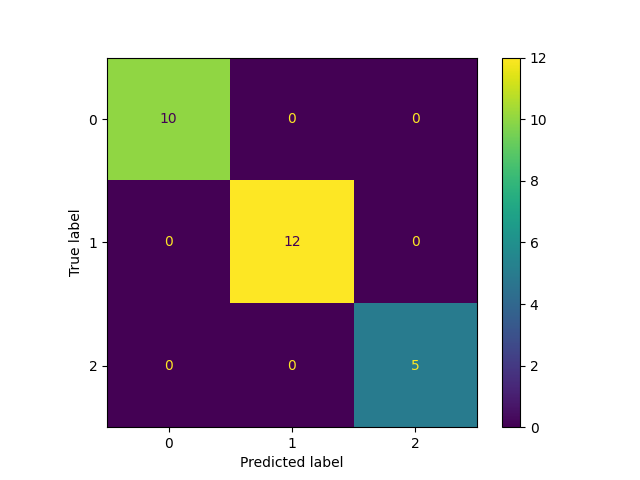

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# ======================== Test Model ========================================
y_prob = model.predict(X_test)
# =============================================================================

matrix = multilabel_confusion_matrix(y_test, y_prob)

display = ConfusionMatrixDisplay.from_predictions(y_test, y_prob)
display.plot()
plt.show()

In [45]:
accuracy_score(y_test, y_prob)

1.0

# Save Model

In [46]:
import pickle

In [47]:
filename = 'mlp.pkl'
pickle.dump(model, open(filename, 'wb'))

# Load Model

In [48]:
loaded_model = pickle.load(open(filename, 'rb'))

# Represents light intensity values

In [49]:
# Sensor's data
test_data = pd.DataFrame.from_dict([dashboard.latest_smartfarm_data]).drop('timeStamp', axis=1)
print('Sensor')
print('moisture   :', test_data.iloc[0]['moisture']);
print('light      :', test_data.iloc[0]['light']);
print()

# AI Prediction
y = model.predict(test_data)
weather = conditions[y].item()
print('Weather')
print('prediction :', weather)
print()

# Pump actions
actions = {
    'sunny': 1,
    'cloudy': 0.5,
    'rainy': 0
}
action = actions[weather]
dashboard.set_light_intensity(actions[weather])# Use Model in Realtime
print('Water pump')
print('action     :', action)

Sensor
moisture   : 0.018
light      : 1.0

Weather
prediction : rainy

Water pump
action     : 0
